In [532]:
import csv
import os
import random
from matplotlib import pyplot as plt

In [533]:
def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'v1_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [1.616463184, 1.482383013, 1.48063302, 1.564979553, 1.443571925]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


In [534]:
class MyLinearUnivariateRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = 0.0

    def fit(self, x, y):

        # --- Formula for Sum-Based Linear Regression ---

        sx = sum(x)
        sy = sum(y)
        sx2 = sum(i * i for i in x)
        sxy = sum(i * j for (i,j) in zip(x, y))
        w1 = (len(x) * sxy - sx * sy) / (len(x) * sx2 - sx * sx)
        w0 = (sy - w1 * sx) / len(x)
        self.intercept_, self.coef_ =  w0, w1

        # --- Formula for Mean-Centered Linear Regression ---

        # x_mean = sum(x) / len(x)
        # y_mean = sum(y) / len(y)
        #
        # up = sum( (xi - x_mean)*(yi-y_mean) for xi, yi in zip(x,y))
        # down = sum( (xi - x_mean)**2 for xi in x)
        # w1 = up / down
        # w0 = y_mean - w1 * x_mean
        #
        # self.intercept_, self.coef_ = w0, w1

    def predict(self, x):
        if (isinstance(x[0], list)):
            return [self.intercept_ + self.coef_ * val[0] for val in x]
        else:
            return [self.intercept_ + self.coef_ * val for val in x]

class MyLinearMultipleRegression:
    def __init__(self):
        self.intercept_ = 0.0  # w0
        self.coef_ = []  # List to store coefficients [w1, w2]

    def fit(self, X, y):

        n = len(X)

        sum_x1 = sum(x[0] for x in X)
        sum_x2 = sum(x[1] for x in X)
        sum_y = sum(y)

        sum_x1y = sum(x[0] * y_i for x, y_i in zip(X, y))
        sum_x2y = sum(x[1] * y_i for x, y_i in zip(X, y))
        sum_x1x1 = sum(x[0] ** 2 for x in X)
        sum_x2x2 = sum(x[1] ** 2 for x in X)
        sum_x1x2 = sum(x[0] * x[1] for x in X)

        denominator = (n * sum_x1x2 - sum_x1 * sum_x2) ** 2 - (n * sum_x2x2 - sum_x2 ** 2) * (n * sum_x1x1 - sum_x1 ** 2)

        w1 = ((n * sum_x1y - sum_x1 * sum_y) * (n * sum_x2x2 - sum_x2 ** 2) -
              (n * sum_x2y - sum_x2 * sum_y) * (n * sum_x1x2 - sum_x1 * sum_x2)) / denominator

        w2 = ((n * sum_x2y - sum_x2 * sum_y) * (n * sum_x1x1 - sum_x1 ** 2) -
              (n * sum_x1y - sum_x1 * sum_y) * (n * sum_x1x2 - sum_x1 * sum_x2)) / denominator

        w0 = (sum_y - w1 * sum_x1 - w2 * sum_x2) / n

        self.intercept_ = w0
        self.coef_ = [ w1, w2]

    def predict(self, X):
        return [self.intercept_ - self.coef_[0] * x[0] - self.coef_[1] * x[1] for x in X]


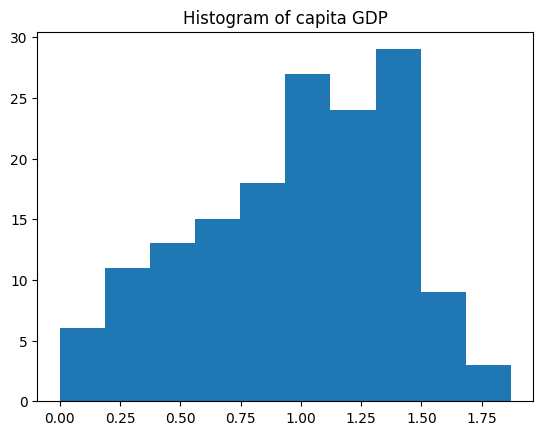

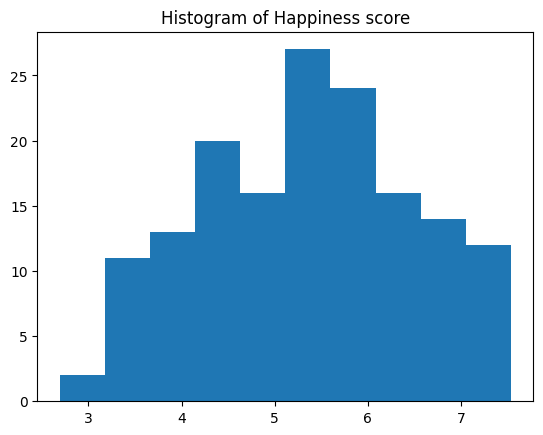

In [535]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs, 'capita GDP')
plotDataHistogram(outputs, 'Happiness score')

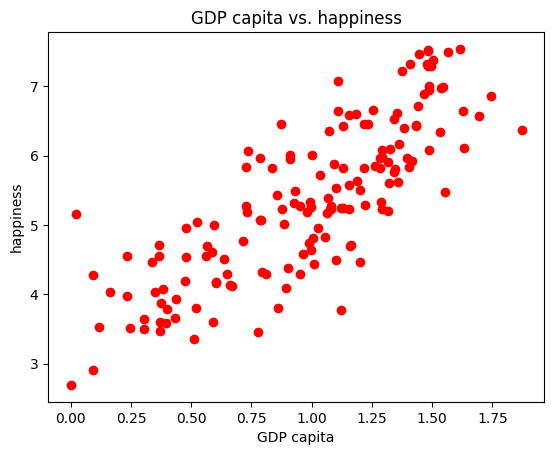

In [536]:
plt.plot(inputs, outputs, 'ro')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('GDP capita vs. happiness')
plt.show()

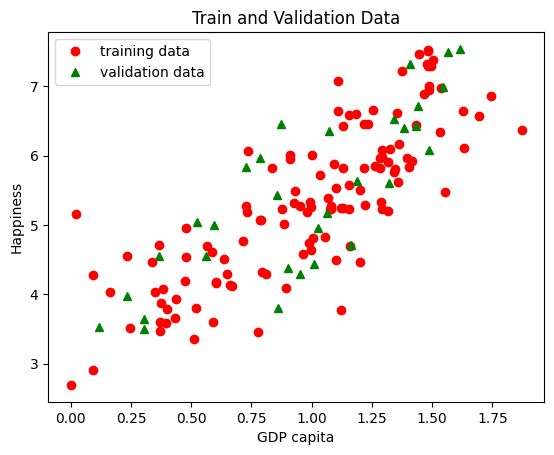

In [537]:
indexes = list(range(len(inputs)))
random.seed(5)
random.shuffle(indexes)

split_index = int(0.8 * len(inputs))

trainSample = indexes[:split_index]
validationSample = indexes[split_index:]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plt.plot(trainInputs, trainOutputs, 'ro', label='training data')
plt.plot(validationInputs, validationOutputs, 'g^', label='validation data')

plt.title('Train and Validation Data')
plt.xlabel('GDP capita')
plt.ylabel('Happiness')
plt.legend()
plt.show()


In [538]:
model = MyLinearUnivariateRegression()
model.fit(trainInputs, trainOutputs)
predictions = model.predict(validationInputs)
w0, w1 = model.intercept_, model.coef_
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  3.192612127500271  +  2.1671416306935414  * x


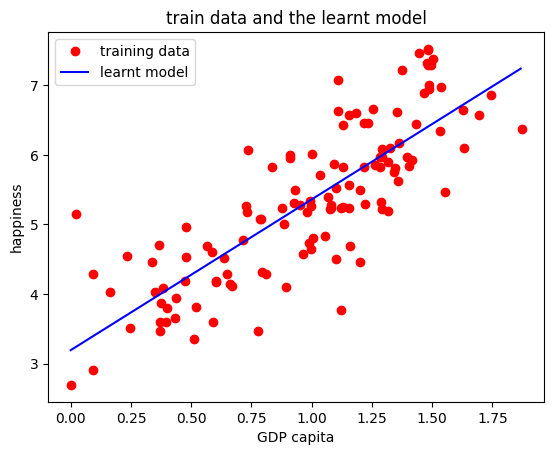

In [539]:
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

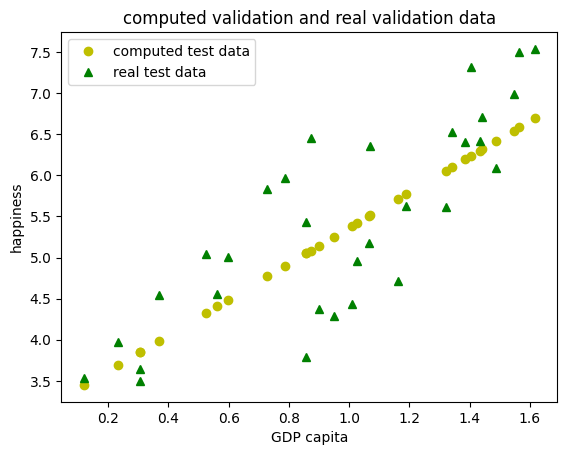

In [540]:
computedValidationOutputs = model.predict([[x] for x in validationInputs])
plt.plot(validationInputs, computedValidationOutputs, 'yo', label = 'computed test data')  #computed test data are plotted yellow red and circle sign
plt.plot(validationInputs, validationOutputs, 'g^', label = 'real test data')  #real test data are plotted by green triangles
plt.title('computed validation and real validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [541]:
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  0.49385174286139677
prediction error (tool):   0.49385174286139677


doar de caracteristica "Family"

in:   [1.510041952, 1.510041952, 1.510041952, 1.510041952, 1.510041952]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


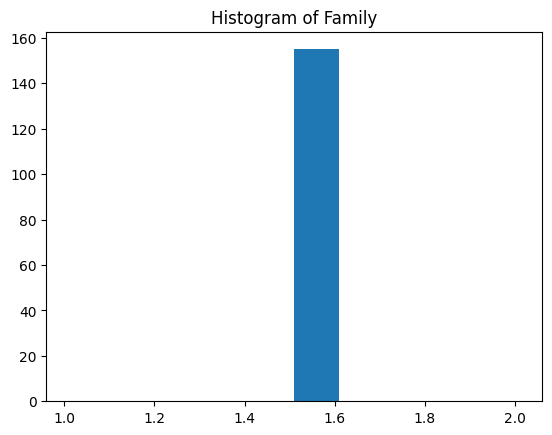

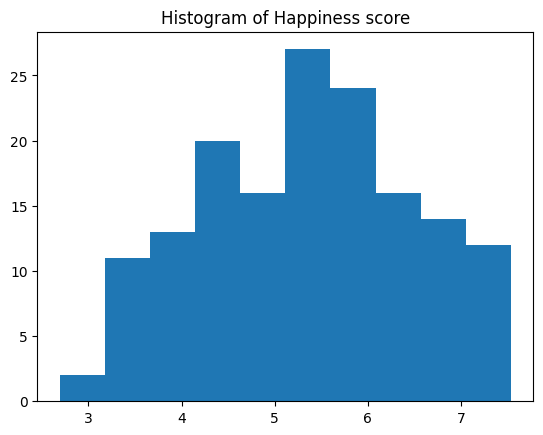

In [542]:
inputs, outputs = loadData(filePath, 'Family', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])
plotDataHistogram(inputs, 'Family')
plotDataHistogram(outputs, 'Happiness score')

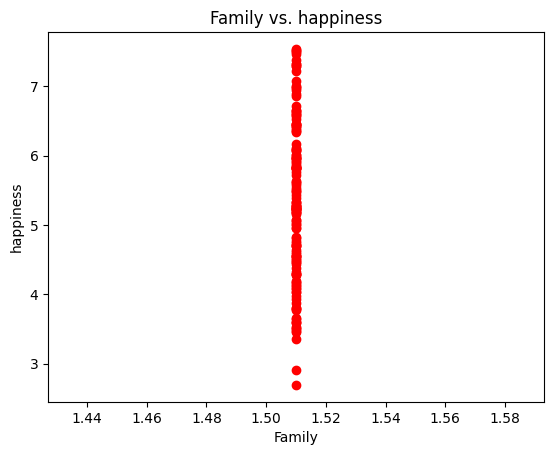

In [543]:
plt.plot(inputs, outputs, 'ro')
plt.xlabel('Family')
plt.ylabel('happiness')
plt.title('Family vs. happiness')
plt.show()

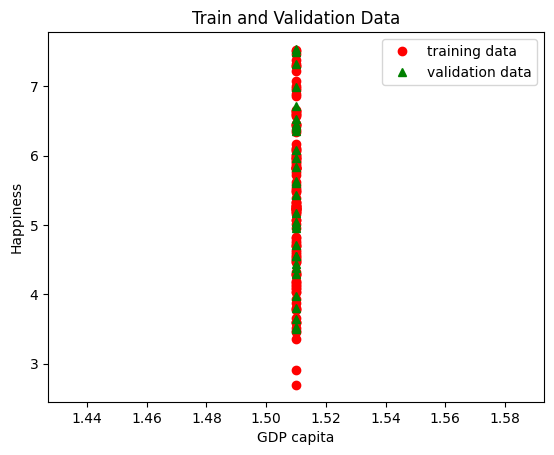

In [544]:
indexes = list(range(len(inputs)))
random.seed(5)
random.shuffle(indexes)

split_index = int(0.8 * len(inputs))

trainSample = indexes[:split_index]
validationSample = indexes[split_index:]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plt.plot(trainInputs, trainOutputs, 'ro', label='training data')
plt.plot(validationInputs, validationOutputs, 'g^', label='validation data')

plt.title('Train and Validation Data')
plt.xlabel('GDP capita')
plt.ylabel('Happiness')
plt.legend()
plt.show()


In [545]:
model2 = MyLinearUnivariateRegression()
model2.fit(trainInputs, trainOutputs)
predictions = model2.predict(validationInputs)
w0, w1 = model2.intercept_, model.coef_
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  2.3151257713790323  +  2.1671416306935414  * x


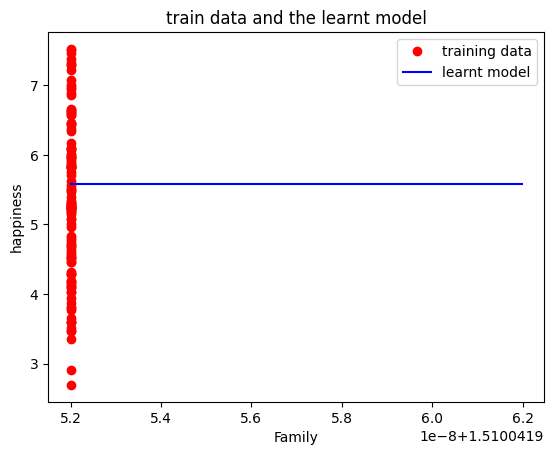

In [546]:
noOfPoints = 1000
xref = []
val = min(trainInputs)
# step = (max(trainInputs) - min(trainInputs)) / noOfPoints # aici step-ul este 0 pentru ca otate datele sunt egale in cazul familiei
step = 0.00000000001
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')
plt.plot(xref, yref, 'b-', label = 'learnt model')
plt.title('train data and the learnt model')
plt.xlabel('Family')
plt.ylabel('happiness')
plt.legend()
plt.show()

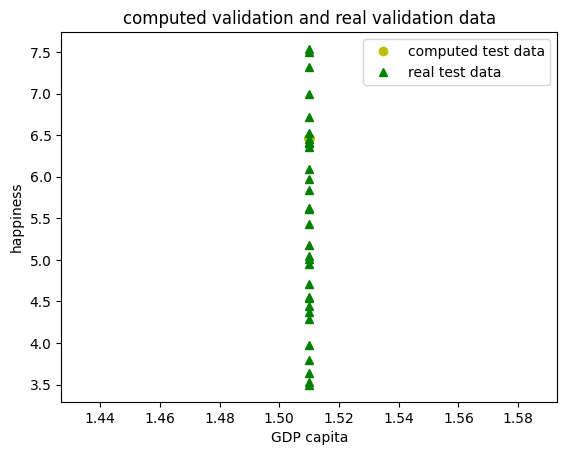

In [547]:
computedValidationOutputs = model.predict([[x] for x in validationInputs])
plt.plot(validationInputs, computedValidationOutputs, 'yo', label = 'computed test data')
plt.plot(validationInputs, validationOutputs, 'g^', label = 'real test data')
plt.title('computed validation and real validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [548]:
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  2.4849264253882812
prediction error (tool):   2.4849264253882812


Pasul 1 - plot pt distributia datelor & plot pt “verificarea” liniaritatii (daca legatura intre y si x e una liniara)

In [549]:
inputs1, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
inputs2, outputs = loadData(filePath, 'Freedom', 'Happiness.Score')
print('in:  ', inputs1[:5])
print('in: ', inputs2[:5])
print('out: ', outputs[:5])

in:   [1.616463184, 1.482383013, 1.48063302, 1.564979553, 1.443571925]
in:  [0.635422587, 0.626006722, 0.627162635, 0.620070577, 0.617950857]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


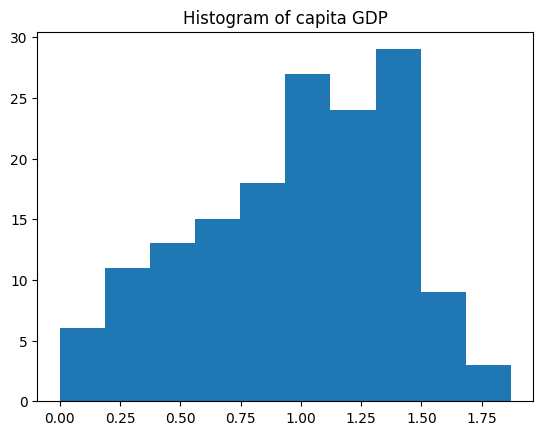

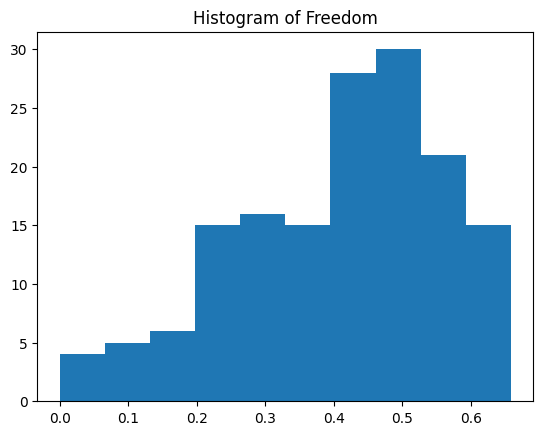

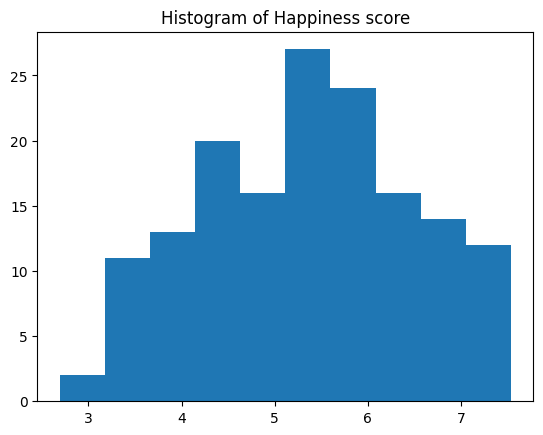

In [550]:
plotDataHistogram(inputs1, 'capita GDP')
plotDataHistogram(inputs2, 'Freedom')
plotDataHistogram(outputs, 'Happiness score')

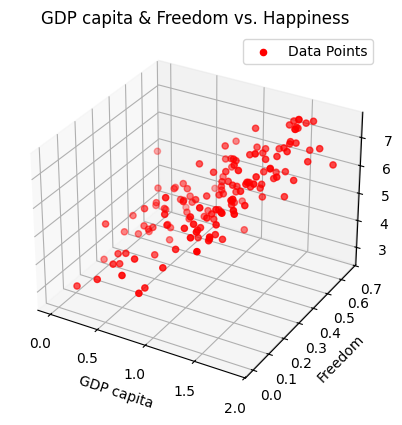

In [551]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inputs1, inputs2, outputs, c='r', marker='o', label='Data Points')
ax.set_xlabel('GDP capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')
ax.set_title('GDP capita & Freedom vs. Happiness')
plt.legend()
plt.show()

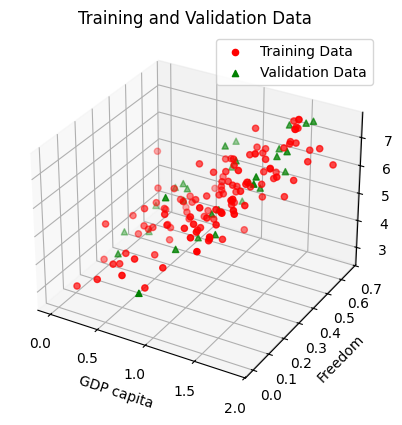

In [552]:
indexes = list(range(len(inputs1)))
random.seed(5)
random.shuffle(indexes)

split_index = int(0.8 * len(inputs1))

trainSample = indexes[:split_index]
validationSample = indexes[split_index:]

trainInputs1 = [inputs1[i] for i in trainSample]
trainInputs2 = [inputs2[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs1 = [inputs1[i] for i in validationSample]
validationInputs2 = [inputs2[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trainInputs1, trainInputs2, trainOutputs, color='red', marker='o', label='Training Data')
ax.scatter(validationInputs1, validationInputs2, validationOutputs, color='green', marker='^', label='Validation Data')
ax.set_xlabel('GDP capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')
ax.set_title('Training and Validation Data')
plt.legend()
plt.show()

In [553]:
trainInputs = [[trainInputs1[i], trainInputs2[i]] for i in range(len(trainInputs1))]
model = MyLinearMultipleRegression()
model.fit(trainInputs, trainOutputs)

w0, w1, w2 = model.intercept_, -1 * model.coef_[0], -1 * model.coef_[1]

print(f'The learnt model: Happiness = {w0:.2f} + {w1:.2f} * GDP + {w2:.2f} * Freedom')

The learnt model: Happiness = 8.05 + 1.87 * GDP + 2.15 * Freedom


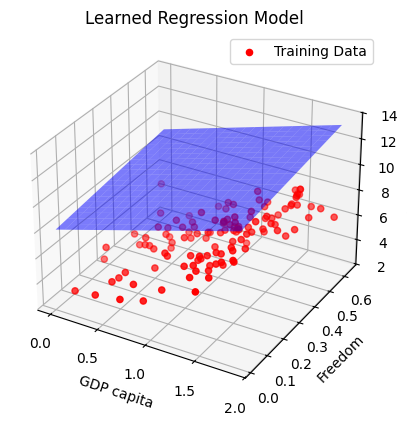

In [554]:
import numpy as np

gdp_range = np.linspace(min(trainInputs1), max(trainInputs1), 20)
freedom_range = np.linspace(min(trainInputs2), max(trainInputs2), 20)
GDP_grid, Freedom_grid = np.meshgrid(gdp_range, freedom_range)

Happiness_grid = w0 + w1 * Freedom_grid + w2 * GDP_grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(trainInputs1, trainInputs2, trainOutputs, color='red', marker='o', label='Training Data')

ax.plot_surface(GDP_grid, Freedom_grid, Happiness_grid, color='blue', alpha=0.5)

ax.set_xlabel('GDP capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')
ax.set_title('Learned Regression Model')

plt.legend()
plt.show()

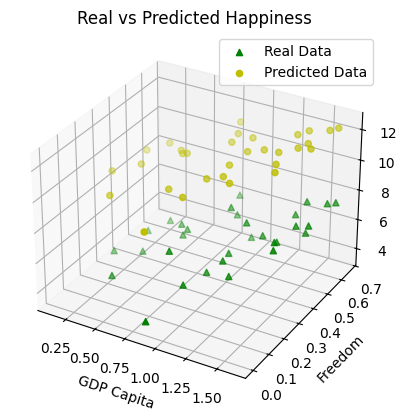

In [555]:
computedValidationOutputs = model.predict(list(zip(validationInputs1, validationInputs2)))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(validationInputs1, validationInputs2, validationOutputs, c='g', marker='^', label='Real Data')
ax.scatter(validationInputs1, validationInputs2, computedValidationOutputs, c='y', marker='o', label='Predicted Data')
ax.set_xlabel('GDP Capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')
ax.set_title('Real vs Predicted Happiness')
ax.legend()
plt.show()

In [556]:
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  29.29401551422581
prediction error (tool):   29.2940155142258
